# Customer Segmentation Clustering

# Import Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
sns.set()
warnings.filterwarnings('ignore')

# Load Data

In [5]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EXploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [9]:
data = data.drop('CustomerID', axis = 1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [10]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


<Axes: >

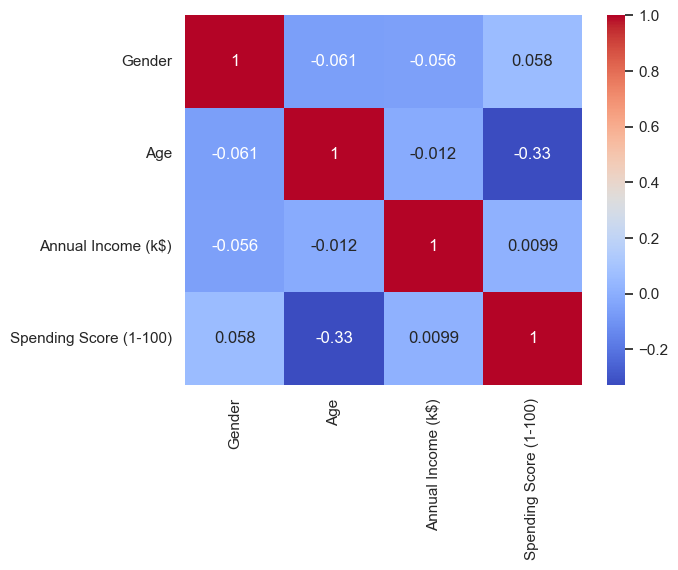

In [11]:
# Correlation 
corr =  data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

# Through correlation we find out that Spendind Score (1-100) and Annual Income (k$) 
# has lowest correlation or both variable are independent and gave best clusters .So,
# we use Spendind Score (1-100) and Annual Income (k$) for our model

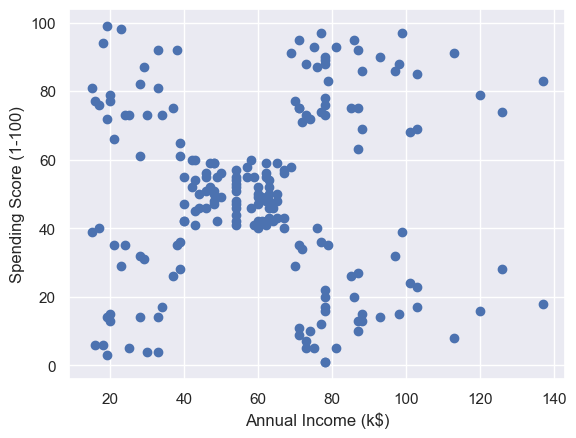

In [13]:
# ploting
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Create Our Model

## Select the features

In [16]:
df = data[['Annual Income (k$)','Spending Score (1-100)']]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Elbow Method

In [18]:
sse = []
for i in range(1, 10):
    kmean = KMeans(i)
    kmean.fit(df)
    sse.append(kmean.inertia_)
sse

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37455.984555160285,
 33630.441206071606,
 29446.77972289338,
 23198.33429865154]

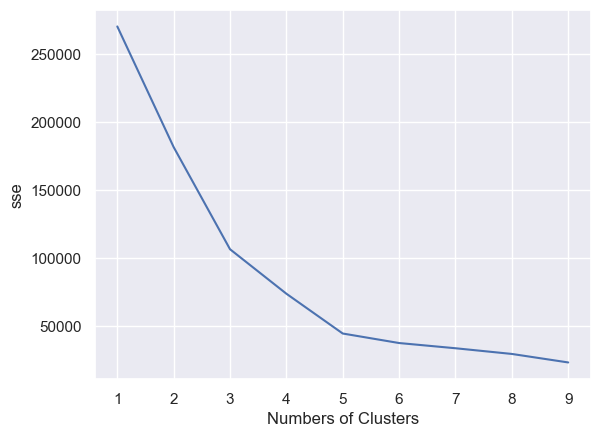

In [19]:
# Now plot sse
plt.plot(range(1,10), sse)
plt.xlabel('Numbers of Clusters')
plt.ylabel('sse')
plt.show()

# Hence through Elbow method we found that the elbow are bend at 3 and 5.
# So, the clusters is 3 or 5 . Lets check which Clusters are suitable for model

# Model with 3 clusters

In [22]:
kmean = KMeans(3)
kmean.fit(df)
predicted = kmean.fit_predict(df)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [23]:
# let include predicted clustersinto our data
df['Clusters'] = predicted
df.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


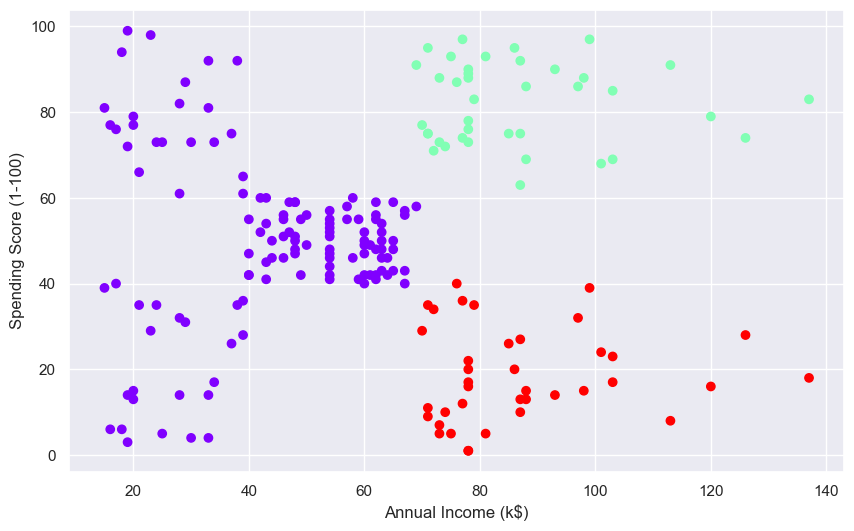

In [24]:
# Let plot the data
plt.figure(figsize= (10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['Clusters'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Model with 5 clusters

In [26]:
kmean = KMeans(5)
kmean.fit(df)
predicted = kmean.fit_predict(df)
predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [27]:
# let include predicted clustersinto our data
df['Clusters'] = predicted
df.head()

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


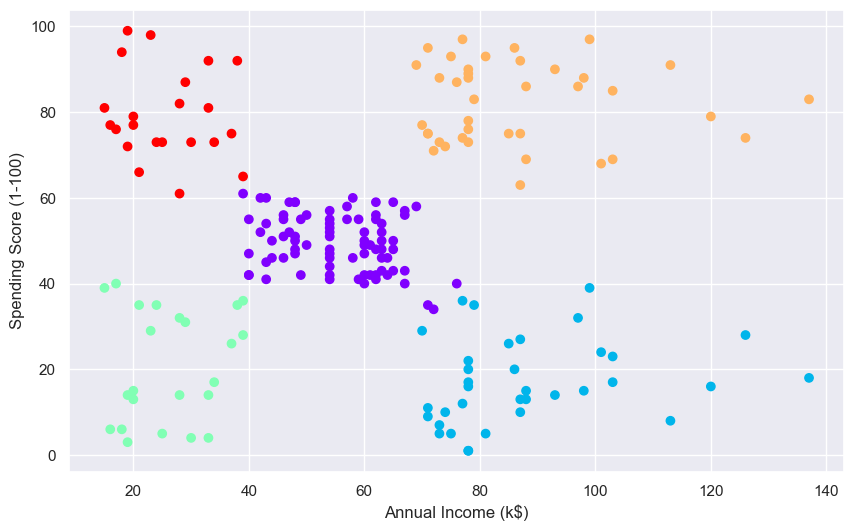

In [51]:
# Let plot the data
plt.figure(figsize= (10,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['Clusters'], cmap = 'rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hence we compare both 3 clusters and 5 clusters model 
# where 5 clusters model are divded into correct and provide insightful 
# visuals 